In [1]:
using PyPlot
using DIVAnd
using Statistics

## Set parameters

In [2]:
dx = dy = 0.25
lonr = 27:dx:42.
latr = 40:dy:48

40.0:0.25:48.0

## Load file

In [3]:
bathname = "../data/gebco_30sec_8.nc"

if !isfile(bathname)
    download("https://b2drop.eudat.eu/s/x83MSV8yUF934bL/download", bathname)
else
    @info("Bathymetry file already downloaded")
end
bathisglobal = true

┌ Info: Bathymetry file already downloaded
└ @ Main In[3]:6


true

## Extract bathymetry

In [4]:
bx,by,b = DIVAnd.extract_bath(bathname,bathisglobal,lonr,latr);

## Create mask

In [5]:
depthr = [0, 150, 500, 1000]
mask = falses(size(b,1),size(b,2),length(depthr))

for k = 1:length(depthr)
    for j = 1:size(b,2)
        for i = 1:size(b,1)
            mask[i,j,k] = b[i,j] >= depthr[k]
        end
    end
end

## Plot mask

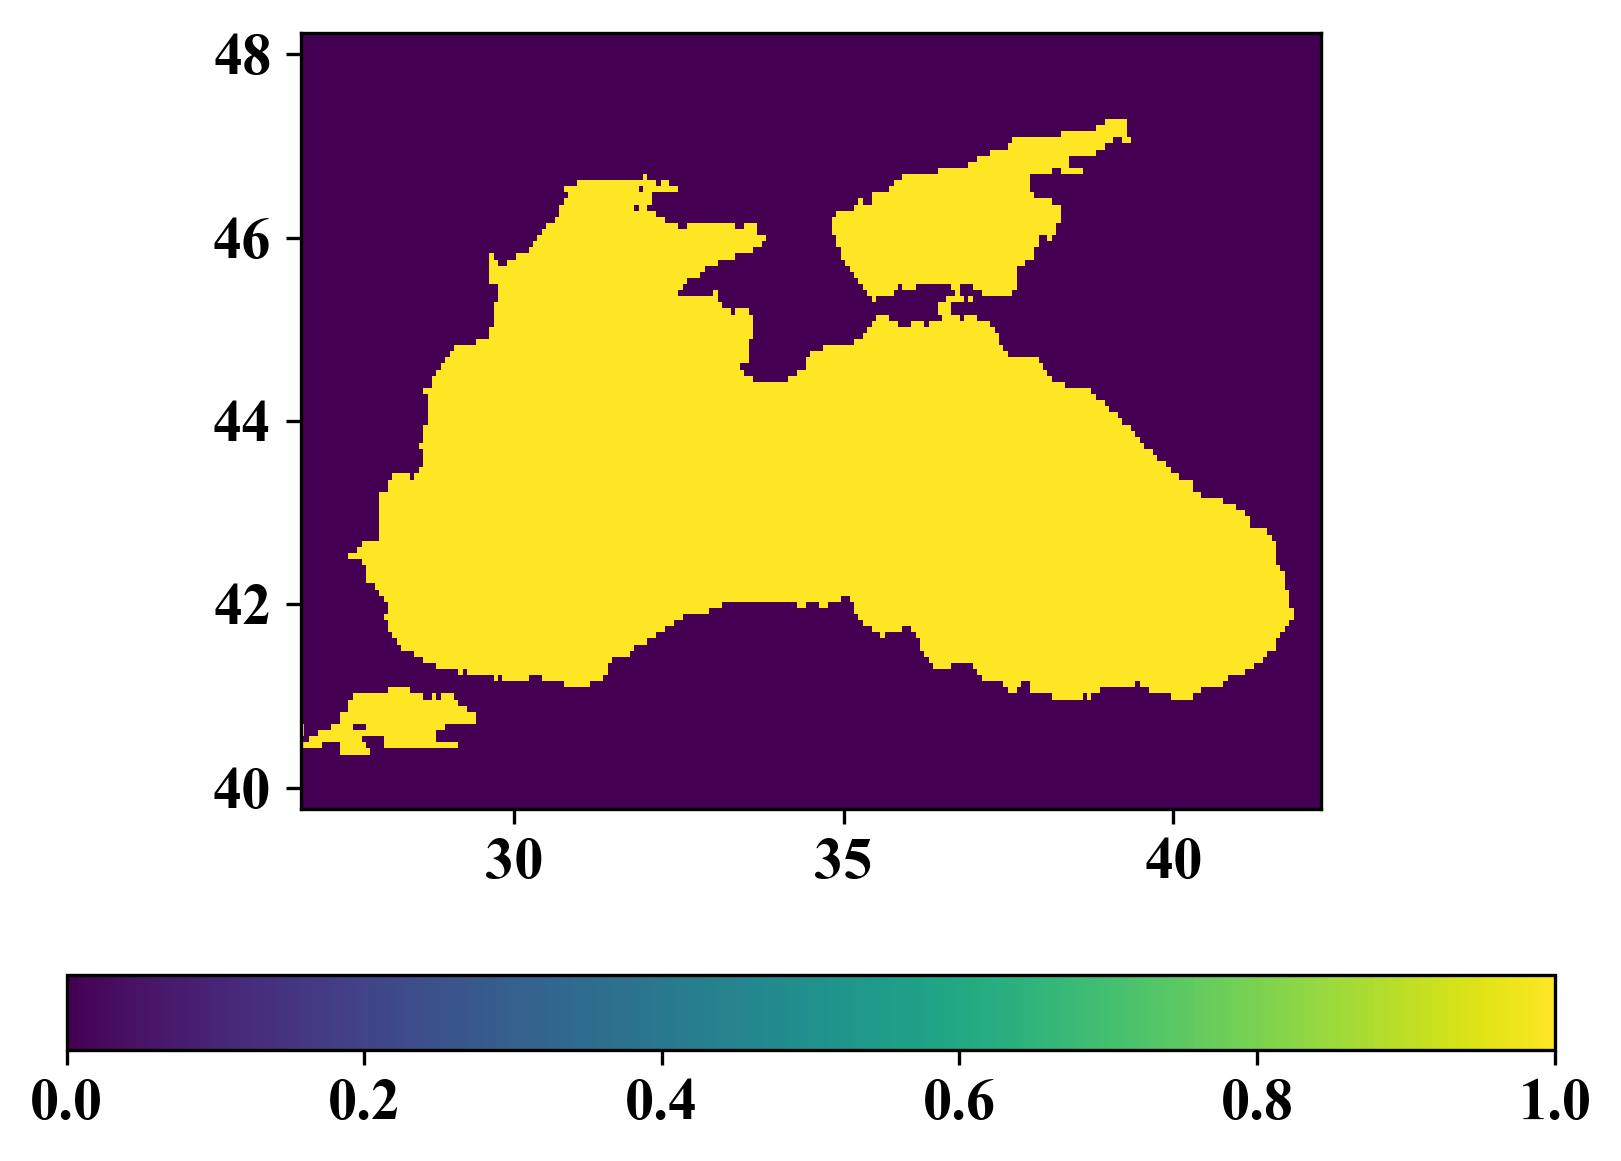

In [6]:
pcolor(bx, by, Float64.(permutedims(mask[:,:,1], [2, 1]))); 
colorbar(orientation="horizontal")
gca().set_aspect(1/cos(Statistics.mean([ylim()...]) * pi/180))

## Edit mask
Remove Sea of Azov and Sea of Marmara

In [7]:
mask_copy = copy(mask);
sel_lon1 = (bx.>34.75);
sel_lat1 = (by.>45.10);
mask_copy[sel_lon1, sel_lat1,1] .= false;
sel_lon2 = (bx.<29.5);
sel_lat2 = (by.<41.125)
mask_copy[sel_lon2, sel_lat2,1] .=false;

## Make a plot

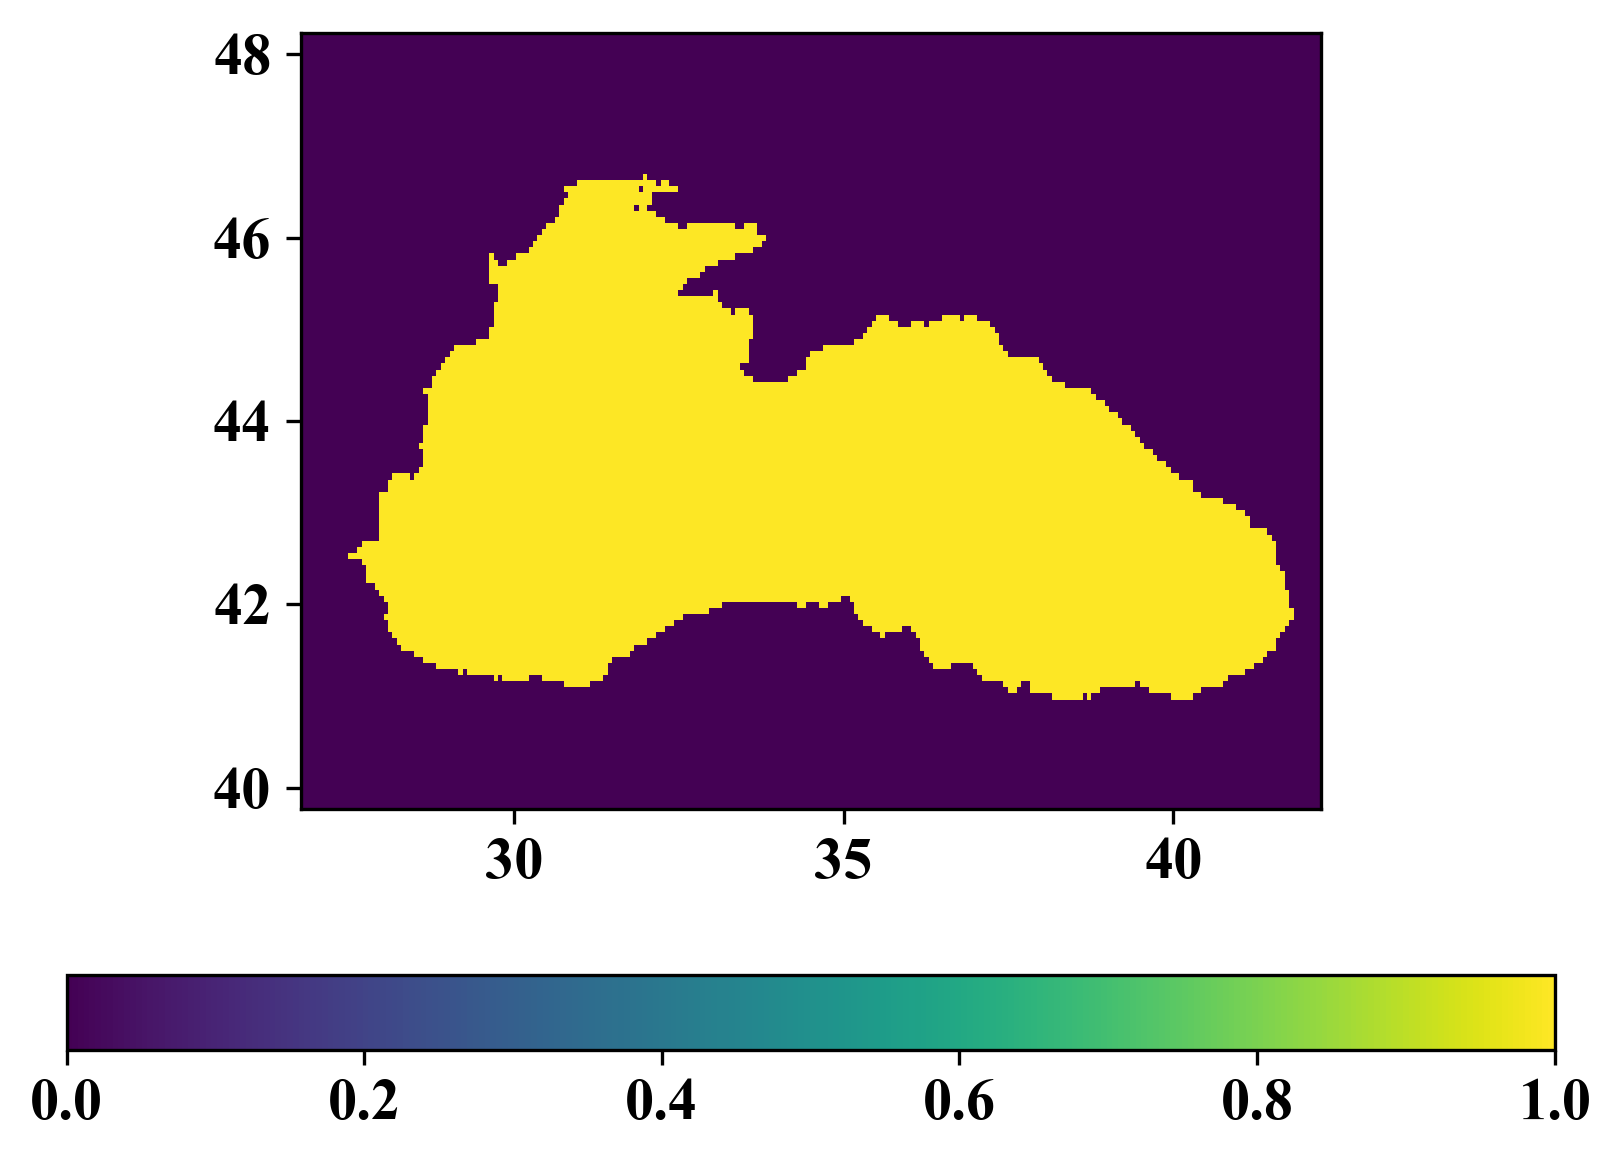

In [8]:
pcolor(bx, by, Float64.(permutedims(mask_copy[:,:,1], [2, 1]))); 
colorbar(orientation="horizontal")
gca().set_aspect(1/cos(Statistics.mean([ylim()...]) * pi/180))